# **#1 Импортируем panel data и  данные**

In [ ]:
import pandas as pd    # анализ и работа с данными (в тч неоднородными) 
import numpy as np  # матрицы , однородные данные
import matplotlib.pyplot as plt # viz library
import seaborn as sns # add. viz library

In [ ]:
# увеличиваем лимиты вывода OUT
pd.set_option('max_colwidth', 400)
pd.set_option('max_rows', 200)

In [ ]:
# ATTENTION!
# You should run the next code section only after u.data.csv has been fully loaded. Please wait half a minute.  

In [ ]:
# загружаем  CSV с фильмами, особенная кодировка файла и индекс('movie_id'),  указываем имена столбцов (в исходнике их нет). Имена берем из README - http://files.grouplens.org/datasets/movielens/ml-100k-README.txt

df_films = pd.read_csv('/content/u.item.csv', 
                       encoding = "ISO-8859-1", 
                       sep="|", 
                       header= None, 
                       names = ['movie_id','movie_title','release_year','video_release_date','IMDb_URL','unknown','Action','Adventure',
                                'Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical',
                                'Mystery','Romance','Sci-Fi','Thriller','War','Western'], 
                       index_col='movie_id')
df_films.name = 'FILM'  
# смотрим первые 5 строк таблицы
display(df_films.head())
# смотрим последние 5 строк таблицы
display(df_films.tail())

,movie_title,release_year,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,movie_title,release_year,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+(1997),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Crazy%20(1994),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Schrei%20aus%20Stein%20(1991),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# загружаем  CSV  активности пользователей, separator - tab, names , no indexes (или создавать user_id+film_id(item_id))
df_ratings = pd.read_csv('/content/u.data.csv', 
                         sep="\t", 
                         header= None, 
                         names = ['user_id','item_id','rating','timestamp'], 
                         index_col=None)
df_ratings.name = 'RATING'
# смотрим первые 5 строк таблицы
display(df_ratings.head())
# смотрим последние 5 строк таблицы
display(df_ratings.tail())

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,user_id,item_id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [ ]:
'''
df_user = pd.read_csv('/content/u.user.csv', 
                      sep='|',
                      header = None, 
                      names = ['user_id','age','gender','occupation','zip code'], 
                      index_col='user_id')
df_user.name = 'USER'
df_user.tail() 
'''

"\ndf_user = pd.read_csv('/content/u.user.csv', \n                      sep='|',\n                      header = None, \n                      names = ['user_id','age','gender','occupation','zip code'], \n                      index_col='user_id')\ndf_user.name = 'USER'\ndf_user.tail() \n"

# **Смотрим данные, форматы, типы. Some practice**

**Find missing values**

In [ ]:
# выведем обобщающую статистику по таблицам
# заодно попрактикуюсь в циклах и форматировании
dfs=[df_films,df_ratings] #, df_user]

for t in dfs:
  # перебираем df
   NaN_counter = 0
   print('Dataframe ' + t.name,'Shape :', str(t.shape[0]) + ' стр.  x ' + str(t.shape[1]) + ' столб.' )
   print('NaN values and dtype by columns:')
   for cc in t.columns:
          # перебираем столбцы
           if t[[cc]].isna().sum()[0] > 0:
             # если в столбце есть NaN 
              print('\t{0}NaN:{2},\tdtype:{1}'.format(t[[cc]].columns[0].ljust(20) , 
                                                str(t[[cc]].dtypes[0]) , 
                                                str(t[[cc]].isna().sum()[0]).rjust(5) 
                                                ),  end='\n')
              NaN_counter +=1
   if NaN_counter == 0:
     #если не было Nan
                     print('        No missing values)))')
   print('Memory usage: {:03.2f} MB'.format(t.memory_usage(deep=True).sum() / 1024 ** 2) + '\n')


Dataframe FILM Shape : 1682 стр.  x 23 столб.
NaN values and dtype by columns:
	release_year        NaN:    1,	dtype:object
	video_release_date  NaN: 1682,	dtype:float64
	IMDb_URL            NaN:    3,	dtype:object
Memory usage: 0.69 MB

Dataframe RATING Shape : 100000 стр.  x 4 столб.
NaN values and dtype by columns:
        No missing values)))
Memory usage: 3.05 MB



In [ ]:
# removing the missing values

#df_films = pd.dropna()

In [ ]:
# replacing the null values

#df_films.fillna(0, inplace = True)

In [ ]:
# replacing the null values in a datetime column

#df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# checking duplicate values

#df_films.duplicated().sum()

In [ ]:
# dropping duplicate values

#df_films.drop_duplicates(inplace=True)

Release year, video_release_date, IMDb_URL    содержат NaN

**Convert timestamp unix epoch time to date**

In [ ]:
#  добавим столбец с Годом выхода фильма. Пригодится позже
#  lambda по-строчно берет данные  из столбца 'release_year' и оставляет только Year                axis=1 - выбор оси, вдоль которой применяется функция. 1 - вдоль столбцов, по-строчно.
import time 
tic = time.time()
df_films['release_year'] = df_films.apply (lambda row: pd.DatetimeIndex([row.release_year]).year[0], axis=1)
print('Execution time {:3.3f} s'.format(time.time() - tic))

Execution time 0.682 s


In [ ]:
# здесь пересчитываем из Unix epoch. Не пригодитя, но для тренировки
tic = time.time()
df_ratings['date'] = df_ratings.apply (lambda row: pd.to_datetime(row.timestamp, unit='s'), axis=1)
print('Execution time {:3.3f} s'.format(time.time() - tic))

Execution time 20.048 s


# Практика работы со строками (фильтрация)   **loc**  по индексу

In [ ]:
# df index
df_ratings.index

RangeIndex(start=0, stop=100000, step=1)

In [ ]:
# выводим первую строку  With a list of integers
display(df_ratings.loc[[0]])

# выводим рейтинг из первой строки и третьего столбца.  With a scalar integer
print('Рейтинг ',df_ratings.loc[0][2])

,user_id,item_id,rating,timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49


Рейтинг  3


In [ ]:
# выведем Дату из последней строки (с индексом 99999)
# сначала указываем строки, потом столбцы 

df_ratings.loc[df_ratings.shape[0]-1]['date']

Timestamp('1997-11-19 17:13:03')

In [ ]:
print ("Всего в БД", str(df_ratings.shape[0]), "строк")  
df_ratings.loc[[df_ratings.shape[0]-1]]  # выводим последнюю строку (индекс последней 100000-1 (нумерация с 0)) 

Всего в БД 100000 строк


,user_id,item_id,rating,timestamp,date
99999,12,203,3,879959583,1997-11-19 17:13:03


In [ ]:
display(df_films.index)
# в файле с фильмами свой индекс - столбец movie_id определили при загрузке из CSV


Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682],
           dtype='int64', name='movie_id', length=1682)

In [ ]:
df_films.loc[[1]]

,movie_title,release_year,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Практика работы со строками (фильтрация) **iloc**  по  физическому номеру строки i - integer

In [ ]:
# выводим первую строку  With a scalar integer
df_ratings.iloc[0]

user_id                      196
item_id                      242
rating                         3
timestamp              881250949
date         1997-12-04 15:55:49
Name: 0, dtype: object

In [ ]:
# выводим первую строку  With a list of integers 
df_ratings.iloc[[0]]

,user_id,item_id,rating,timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49


In [ ]:
# выведем строки по порядку 3,4 5.  нумерация с 0 !  
df_ratings.iloc[[2,3,4]]

,user_id,item_id,rating,timestamp,date
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


In [ ]:
# выведем строки по порядку с 1 по 5,  нумерация с 0 !
df_ratings.iloc[:5]   # то же самое   df_ratings.iloc[0:5]

,user_id,item_id,rating,timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


In [ ]:
#Выявить top-5 самых активных пользователей (больше всего оценок) за последние 3 месяца 
df_query = df_ratings.query('date > \'1998-02-01\'')\
                      .groupby(by = 'user_id')['rating']\
                      .agg(['count'])\
                      .sort_values(by='count', ascending=False)
df_query.rename(columns={"count": "Количество оценок"}, inplace = True)
df_query.iloc[:5]

,Количество оценок
user_id,
655,685
234,480
393,448
7,403
682,399


Рисунок из Google Sheets для проверки запроса

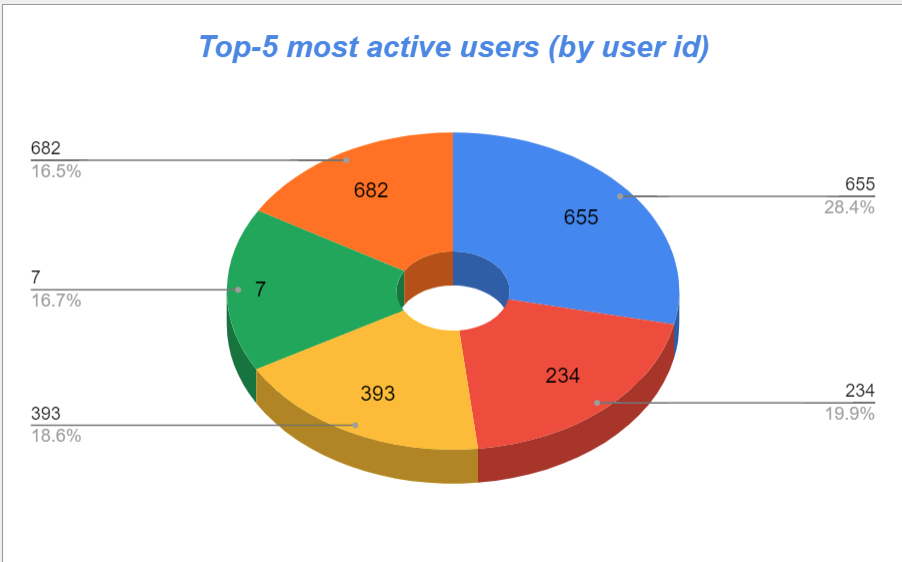

# **#2 Средствами Pandas, используя dataframe ratings, найдите id пользователя, поставившего больше всего оценок**

In [ ]:
#  Средствами Pandas, используя dataframe ratings, найдите id пользователя, поставившего больше всего оценок
#                           group by user id           count ('rating')     order by

df_query = df_ratings.groupby(by = 'user_id')['rating']\
                    .agg(['count'])\
                    .sort_values(by='count', ascending=False)
#display(df_query.iloc[:1])

super_userid = str(df_query.index[0])
print('Пользователь, поставивший больше всего оценок, имеет ID ',super_userid)

Пользователь, поставивший больше всего оценок, имеет ID  405


То же самое, но через привычный SQL

In [ ]:
#  найдите id пользователя, поставившего больше всего оценок

from sqlite3 import connect
#from sqlalchemy import create_engine
#engine = create_engine('sqlite://', echo=False)

conn = connect(':memory:')

# конвертируем df, чтобы к ней можно было обратиться в SQL запросе
df_ratings.to_sql('ratings', con=conn) 
# читаем SQL запрос
df_query=pd.read_sql('SELECT user_id, count(rating)  FROM ratings GROUP BY user_id ORDER BY count(rating) DESC LIMIT 1',  con=conn)

super_userid = str(df_query.iloc[0,0])  # или  df_query.loc[0][0]
print('Пользователь, поставивший больше всего оценок, имеет ID ',super_userid)


Пользователь, поставивший больше всего оценок, имеет ID  405


# **#3 Оставьте в датафрейме ratings только те фильмы, который оценил данный пользователь**

In [ ]:
# фильтр по "суперпользователю"
df_superuser = df_ratings.query('user_id ==' + super_userid)
print('Самый активный пользователь поставил ', str(df_superuser.shape[0]), " оценки")

Самый активный пользователь поставил  737  оценки


# **#4 Добавьте к датафрейму из задания 3 столбцы:**
* По жанрам. Каждый столбец - это жанр.
Единицу записываем, если фильм
принадлежит данному жанру и 0 - если
нет

* столбцы с общим количеством оценок
от всех пользователей на фильм и
суммарной оценкой от всех
пользователей

In [ ]:
#  сгруппируем БД рейтингов по фильмам и посчитаем метрики (Sum, Count) в разрезе всех пользователей
df_ratings_grouped = df_ratings.groupby(by = 'item_id', axis=0)['rating'].aggregate(['count','sum']).sort_values(by='sum', ascending=False)
df_ratings_grouped.shape[0]

1682

Всё верно. Как и в таблице Films, в df_ratings_grouped 1682 записи

In [ ]:
# объединим   df_ratings_grouped (с общими метриками) и  df_superuser (с оценками суперюзера)
df_ratings_merged = pd.merge(df_superuser, df_ratings_grouped,how="left", left_on="item_id", right_on="item_id").sort_values(by='sum', ascending=False)
df_ratings_merged.shape[0]

737

Число записей равно кол-ву оценок суперюзера. Все верно

Для построения модели нам нужны признаки. В качестве таковых будем использовать:

● Год выхода

● Жанры

● Общее количество оценок

● Суммарную оценку


In [ ]:
# обогатим данными по фильмам 
df_ratings_merged = pd.merge(df_ratings_merged, df_films,how="left", left_on="item_id", right_on="movie_id")
df_ratings_merged.sort_values(by='sum', ascending=False)

,user_id,item_id,rating,timestamp,date,count,sum,movie_title,release_year,video_release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,405,50,5,885544947,1998-01-23 08:42:27,583,2541,Star Wars (1977),1977.0,NaN,...,0,0,0,0,0,1,1,0,1,0
1,405,181,5,885547909,1998-01-23 09:31:49,507,2032,Return of the Jedi (1983),1997.0,NaN,...,0,0,0,0,0,1,1,0,1,0
2,405,174,5,885544739,1998-01-23 08:38:59,420,1786,Raiders of the Lost Ark (1981),1981.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,405,127,5,885545167,1998-01-23 08:46:07,413,1769,"Godfather, The (1972)",1972.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,405,98,4,885544798,1998-01-23 08:39:58,390,1673,"Silence of the Lambs, The (1991)",1991.0,NaN,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,405,1548,1,885547952,1998-01-23 09:32:32,1,1,The Courtyard (1995),1995.0,NaN,...,0,0,0,0,0,0,0,1,0,0
711,405,1570,1,885549544,1998-01-23 09:59:04,1,1,Quartier Mozart (1992),1992.0,NaN,...,0,0,0,0,0,0,0,0,0,0
710,405,1576,1,885549464,1998-01-23 09:57:44,1,1,"Hungarian Fairy Tale, A (1987)",1987.0,NaN,...,1,0,0,0,0,0,0,0,0,0
709,405,1568,1,885547222,1998-01-23 09:20:22,1,1,Vermont Is For Lovers (1992),1992.0,NaN,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_ratings_merged.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'date', 'count', 'sum',
       'movie_title', 'release_year', 'video_release_date', 'IMDb_URL',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

посмотрим на распределение независимых атрибутов относительно целевого параметра

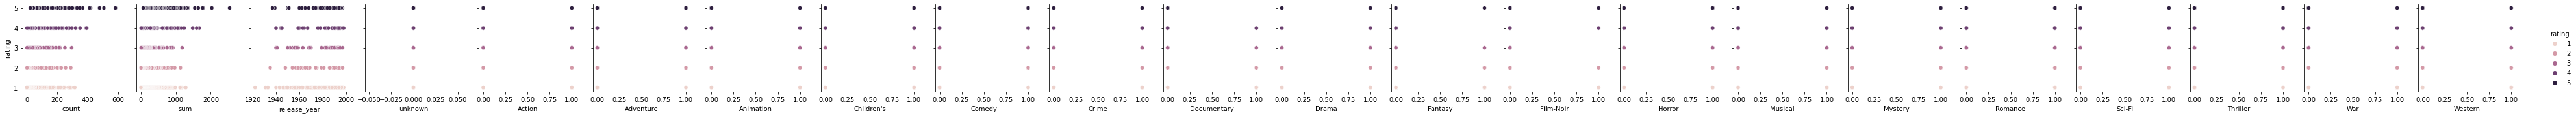

In [ ]:
sns.pairplot(df_ratings_merged, 
    x_vars=['count', 'sum', 'release_year', 'unknown',
               'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
               'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
               'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
    y_vars=['rating'],
    kind="scatter",   # kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}
    hue='rating'
    )

unknown - похоже константа
проверим количество уникальных значений (если 1, то исключить):

In [ ]:
df_ratings_merged.nunique(axis=0)

user_id                 1
item_id               737
rating                  5
timestamp             154
date                  154
count                 212
sum                   389
movie_title           736
release_year           63
video_release_date      0
IMDb_URL              735
unknown                 1
Action                  2
Adventure               2
Animation               2
Children's              2
Comedy                  2
Crime                   2
Documentary             2
Drama                   2
Fantasy                 2
Film-Noir               2
Horror                  2
Musical                 2
Mystery                 2
Romance                 2
Sci-Fi                  2
Thriller                2
War                     2
Western                 2
dtype: int64

'unknown' - константа - исключить,

user_id тоже 1 значение, потому что это сгруппированные данные по суперпользователю

video_release_date  - все NaN

Проверим корреляцию независимых параметров:

In [ ]:
# Finding out the correlation between the features
corr = df_ratings_merged.corr()
corr.shape

(27, 27)

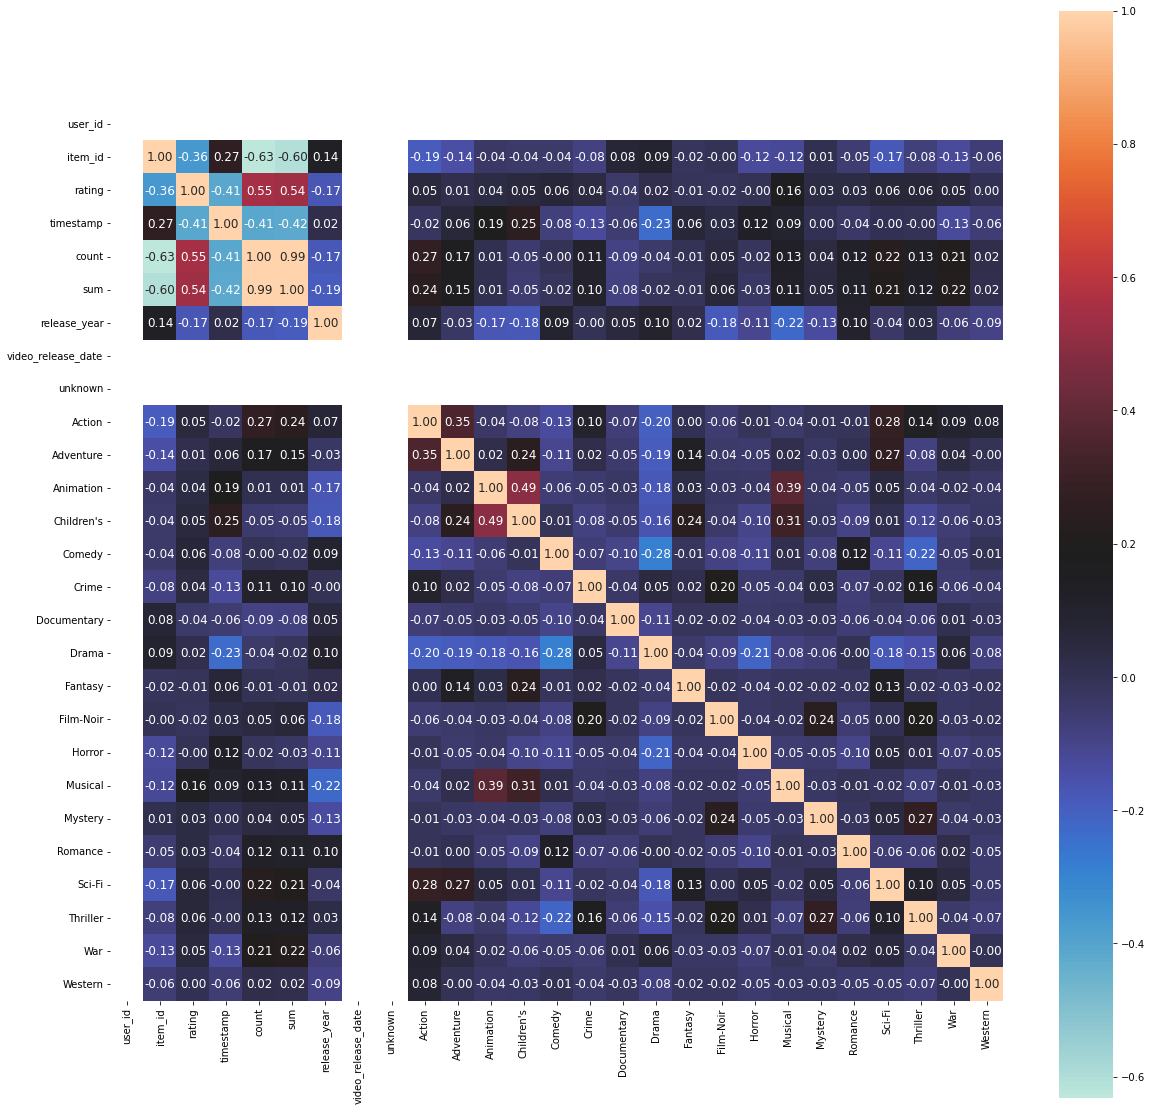

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':12}, cmap='icefire')

SUM <-> COUNT -0.99!
надо оставить что-то одно

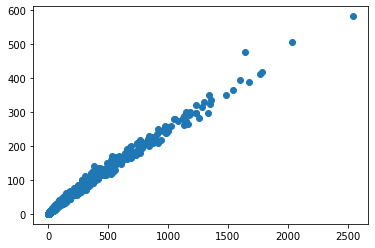

In [ ]:
# Построим точечный график для дополнительной проверки 
import matplotlib.pyplot as plt # viz library
import seaborn as sns # add. viz library
plt.scatter(
    df_ratings_merged['sum'],
    df_ratings_merged['count']
)

фактически линейная зависимость.
оставим SUM

In [ ]:
""" определим атрибуты для моделирования.
 убрал:'rating' -целевой атрибут
       'user_id', 'item_id' - индексы
       'timestamp',  'date' - временные отметки
       'movie_title', 'IMDb_URL' - справочная информация, 
       'video_release_date' - NaN
       'unknown' - constant value,
       'sum' - высокая корреляция с count
"""

independent_feat = [  'sum', 'release_year',  'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']
X = df_ratings_merged.loc[:,independent_feat] # ограничиваем датафрейм X независимыми столбцами
y = df_ratings_merged['rating'] # определяем зависимый атрибут 

In [ ]:
# финальная проверка на NaN
X.isnull().sum()

sum             0
release_year    0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

Всё в порядке. NaN отсутствуют

Итак, сейчас подготовлена к тестированию следующая модель:
- на основе общих метрик (сумма всех оценок и общее количество оценок по каждому фильму, году его выхода и жанру  мы будем  предсказывать, 
понравится ли этот фильм самому активному пользователю (user_id=405 и 737 оценок).



# **#5 Сформируйте X_train, X_test, y_train, y_test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= None)

# **#6 Возьмите модель линейной регрессии (или любую другую для задачи регрессии) и обучите ее на фильмах**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
 
tic = time.time()

# прогоняем на установках по умолчанию, scaler - для приближения рассеивания к НЗР ()
pipe = Pipeline([('scaler', StandardScaler()),
                 ('logit', LogisticRegression())])
pipe.fit(X_train, y_train )

logit_default_score = pipe.score(X_test, y_test)
print('Default Scaler and Classifier parameters.\n')
print('Training set score: {:2.2%}'.format(pipe.score(X_train, y_train)))
print('Test set score: {:2.2%}\n'.format(logit_default_score))

print('Execution time {:3.3f} s'.format(time.time() - tic))

Default Scaler and Classifier parameters.

Training set score: 71.26%
Test set score: 63.51%

Execution time 0.039 s


Подбираем оптимальные  гиперпараметры и варианты нормализации входных данных, используя GridSearchCV

In [ ]:
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

tic = time.time()

parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
	            'logit__tol': [1e-2, 1e-3],           #Tolerance for stopping criteria.
              'logit__C': [ 1, 2, 4, 5],            # Regularization parameter.
              'logit__max_iter': [500, 2e+4],  
              'logit__multi_class': ['ovr','multinomial'],
              'logit__n_jobs':[-1]
            }

grid = GridSearchCV(pipe, parameters, cv=10).fit(X_train, y_train)

logit_optim_score = grid.score(X_test, y_test)
print('Training set best score: {:2.2%}'.format(grid.score(X_train, y_train)))
print('Test set best score: {:2.2%}'.format(logit_optim_score))

print('\nExecution time {:3.3f} s'.format(time.time() - tic))

Training set best score: 69.51%
Test set best score: 64.41%

Execution time 58.103 s


In [ ]:
print('улучшение относительно установок по умолчанию {:2.2%}'.format(logit_optim_score - logit_default_score))

улучшение относительно установок по умолчанию 0.90%


Выведем оптимальные настройки конвейера

In [ ]:
# Access the best set of parameters
best_params = grid.best_params_
print('\nOptimal set of parameters:', best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print('\nOptimal pipeline:', best_pipe)


Optimal set of parameters: {'logit__C': 1, 'logit__max_iter': 500, 'logit__multi_class': 'multinomial', 'logit__n_jobs': -1, 'logit__tol': 0.01, 'scaler': Normalizer()}

Optimal pipeline: Pipeline(steps=[('scaler', Normalizer()),
                ('logit',
                 LogisticRegression(C=1, max_iter=500,
                                    multi_class='multinomial', n_jobs=-1,
                                    tol=0.01))])


In [ ]:
# Actual number of iterations for all classes. 
#If binary or multinomial, it returns only 1 element. For liblinear solver, only the maximum number of iteration across all classes is given.

best_pipe['logit'].n_iter_

array([33], dtype=int32)

In [ ]:
# переведем словарь подобранных гиперпараметров  в DataFrame
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_logit__C', 'param_logit__max_iter', 'param_logit__multi_class',
       'param_logit__n_jobs', 'param_logit__tol', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


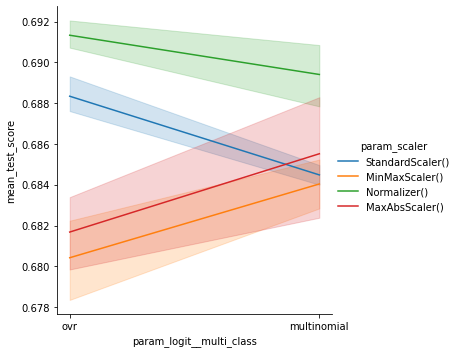

In [ ]:
# сравним эффективность использования различных нормализаторов
sns.relplot(data=result_df,
	kind='line',
	x='param_logit__multi_class',
	y='mean_test_score',
	hue='param_scaler')
plt.show()

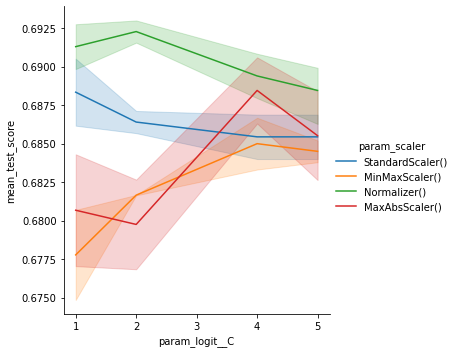

In [ ]:
# визуализируем работу нормализаторов
sns.relplot(data=result_df,
	kind='line',
	x='param_logit__C',
	y='mean_test_score',
	hue='param_scaler')
plt.show()

In [ ]:
best_pipe.feature_names_in_

array(['sum', 'release_year', 'Action', 'Adventure', 'Animation',
       "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'], dtype=object)

In [ ]:
# по каким характеристикам строилась модель? 
print('Входных параметров {}\tКлассов:{}\tИтераций:{}'.format(best_pipe['logit'].n_features_in_ ,
                                                              best_pipe['logit'].classes_ ,
                                                              best_pipe['logit'].n_iter_  ))

Входных параметров 20	Классов:[1 2 3 4 5]	Итераций:[33]


#  **#7 Оцените качество модели на X_test, y_test при помощи метрик для задачи регрессии**


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = pd.Series(best_pipe.predict(X_test))
print(classification_report(y_test, y_pred, zero_division=0))

accuracy_score( y_test, y_pred)

              precision    recall  f1-score   support

           1       0.66      0.99      0.79       140
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        17
           5       0.42      0.29      0.34        17

    accuracy                           0.64       222
   macro avg       0.21      0.26      0.23       222
weighted avg       0.45      0.64      0.52       222



0.6441441441441441

Хорошие результаты  по плохим фильмам. Будем точно знать, что не предлагать)

Точность предсказания  по хорошим фильмам (4 и 5) сильно хуже.

In [ ]:
print('Скоринг на train',  "{0:.1f}%".format(best_pipe.score(X_train, y_train)*100) )
print('Скоринг на test',  "{0:.1f}%".format(best_pipe.score(X_test, y_test)*100) )
print('Падение точности на тестовой выборке ', "{0:.1f}%".format((best_pipe.score(X_train, y_train) - (best_pipe.score(X_test, y_test)))\
                                                                 / best_pipe.score(X_train, y_train) *100 ))

Скоринг на train 69.5%
Скоринг на test 64.4%
Падение точности на тестовой выборке  7.3%


# **Пробуем SVM**

**Support Vector Classifier**

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X, y)

y_pred = pd.Series(clf.predict(X_test))

accuracy_score(y_pred, y_test, normalize=True)

0.6441441441441441

In [ ]:
# get support vectors
#clf.support_vectors_

In [ ]:
# get indices of support vectors
#clf.support_

In [ ]:
# get number of support vectors for each class
clf.n_support_

array([146,  73,  63,  48,  65], dtype=int32)

**Linear Support Vector Classifier**

In [ ]:
lin_clf = svm.LinearSVC(dual=False, tol=0.0001, max_iter=1000, C=1.0, multi_class='ovr', verbose=1)
lin_clf.fit(X, y)

y_pred = pd.Series(lin_clf.predict(X_test))#.round()

accuracy_score(y_pred, y_test, normalize=True)

[LibLinear]

0.6576576576576577

In [ ]:
lin_clf.score(X_test, y_test)

0.6576576576576577

In [ ]:
# Number of features seen during fit.
lin_clf.feature_names_in_

array(['sum', 'release_year', 'Action', 'Adventure', 'Animation',
       "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'], dtype=object)

In [ ]:
#   Maximum number of iterations run across all classes.
lin_clf.n_iter_ 
#lin_clf.coef_

14

**Gradient Boosting Classifier**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier

select = SelectKBest(k= 'all')  #k='all'

# Fit to data, then transform it. Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
X_train_selected = select.fit_transform(X_train, y_train)

gbc = GradientBoostingClassifier(learning_rate= 1e-3,random_state=5)
gbc.fit(X_train_selected, y_train)

#GradientBoostingClassifier(random_state=1)

X_test_selected = select.transform(X_test)
y_pred = gbc.predict(X_test_selected)

accuracy_score(y_test, y_pred)

0.6306306306306306

In [ ]:
#    Number of features seen during fit.
print(select.n_features_in_ , select.feature_names_in_)

20 ['sum' 'release_year' 'Action' 'Adventure' 'Animation' "Children's"
 'Comedy' 'Crime' 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


In [ ]:
'''
scores_ : array-like of shape (n_features,)
    Scores of features.

pvalues_ : array-like of shape (n_features,)
    p-values of feature scores, None if score_func returned only scores.

n_features_in_ : int
    Number of features seen during fit.

feature_names_in_ : ndarray of shape (n_features_in_,)
    Names of features seen during fit. Defined only when X has feature names that are all strings.
'''
#    Scores of features.
select.scores_

array([50.24768432,  5.15990059,  1.55068433,  4.31121348,  0.45248283,
        4.72950064,  3.38368558,  0.68768478,  0.63520749,  0.52821462,
        1.42798276,  0.28129912,  0.87626051,  3.21747909,  0.49636013,
        1.17370842,  0.70633182,  0.34989139,  0.93300172,  0.4854418 ])

**feature_selection and Random Forest Clfssifier in PipeLine**

In [ ]:
from sklearn.feature_selection import SelectFromModel
#from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


clf = Pipeline([
    #evaluate feature importances and select the most relevant features
  ('feature_selection', SelectFromModel(svm.LinearSVC(dual=False,
                                                      max_iter=10000,
                                                      multi_class='ovr'))),
  # a RandomForestClassifier is trained on the transformed output, i.e. using only relevant features
  ('classification', RandomForestClassifier(n_estimators=200, max_depth=None, verbose=0))
])
clf.fit(X, y)

#print(accuracy_score(y_test, clf.predict(X_test)))
print(clf.score(X_test,y_test))
clf['classification']

0.6576576576576577


RandomForestClassifier(n_estimators=200)

In [ ]:
print(clf.n_features_in_)
print(clf.feature_names_in_)

20
['sum' 'release_year' 'Action' 'Adventure' 'Animation' "Children's"
 'Comedy' 'Crime' 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


In [ ]:
print(clf['feature_selection'].get_feature_names_out().shape[0])
clf['feature_selection'].get_feature_names_out()

8


array(['Action', 'Adventure', "Children's", 'Comedy', 'Crime', 'Musical',
       'Sci-Fi', 'War'], dtype=object)

не отобраны значимые атрибуты - 'sum' 'release_year' !
модель построена только на данных о жанрах!


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators - The number of trees in the forest.
clf = RandomForestClassifier(n_estimators=500, max_depth=10)
clf = clf.fit(X_train, y_train)

print(clf.score(X_test,y_test))

#print (clf.base_estimator, clf.estimator_params)

0.6441441441441441


# GridSearchCV

In [ ]:
#from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization



pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

In [ ]:
pipe.fit(X_train, y_train)
 
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))
pipe[2]

Training set score: 0.7067961165048544
Test set score: 0.6441441441441441


KNeighborsClassifier()

In [ ]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()], 
              'selector__threshold': [1e-3, 1e-4],
							'classifier__n_neighbors': [10, 20, 40, 80],
							'classifier__p': [1, 2],
							'classifier__leaf_size': [1, 5, 10, 20]
						}

In [ ]:
tic = time.time() 
grid = GridSearchCV(pipe, parameters, cv=5).fit(X_train, y_train)
 
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

print('\nExecution time {:3.3f} s'.format(time.time() - tic))

Training set score: 0.6951456310679611
Test set score: 0.6441441441441441

Execution time 21.129 s


In [ ]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params, '\n')
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 40, 'classifier__p': 1, 'scaler': Normalizer(), 'selector__threshold': 0.001} 

Pipeline(steps=[('scaler', Normalizer()),
                ('selector', VarianceThreshold(threshold=0.001)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=40, p=1))])


In [ ]:
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


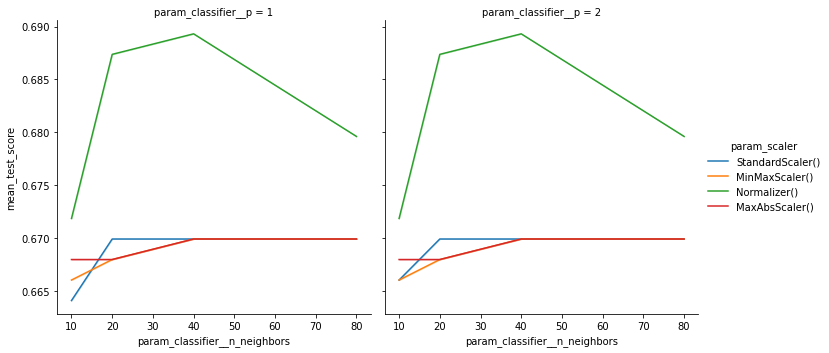

In [ ]:
sns.relplot(data=result_df,
	kind='line',
	x='param_classifier__n_neighbors',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__p')
plt.show()

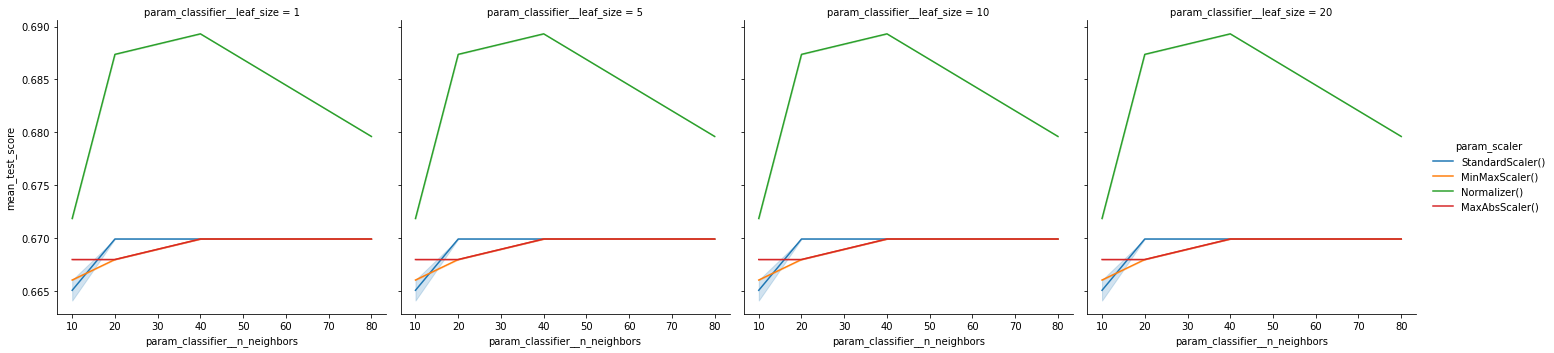

In [ ]:
sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__leaf_size')
plt.show()

**ideal algorithm**:

общая модель:
- рассчитать матрицу (кластеризировать оценки всех пользователей по): жанр, год выпуска, возраст, профессия, пол -> оценка 4 или 5

модель пользователя:

на основании того, к какому кластеру относится конкретный юзер
выдавать рекомендации по фильму
с постоянныи уточнением на основании исторических данных 

# #8 Загрузить данные в spark

In [ ]:
%%time
!apt-get update #libraries update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # java installation
!wget -q https://downloads.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3-scala2.13.tgz #download actual spark version
!tar -xvf spark-3.3.0-bin-hadoop3-scala2.13.tgz # unzip spark 
!pip install -q findspark # install python findspark module

import os
# define additional environment variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3-scala2.13"

"""Find spark home, and initialize by adding pyspark to sys.path.

If SPARK_HOME is defined, it will be used to put pyspark on sys.path.
Otherwise, common locations for spark will be searched."""

import findspark
# initialize findspark
findspark.init()
from pyspark.sql import SparkSession

# master. Sets the Spark master URL to connect to, 
#such as "local" to run locally, "local[4]" to run locally with 4 cores, 
#or "spark://master:7077" to run on a Spark standalone cluster.
spark = SparkSession.builder.master("local[*]").getOrCreate()

"""
Main entry point for Spark functionality. 
A SparkContext represents the connection to a Spark cluster, and can be used to create RDDs, 
accumulators and broadcast variables on that cluster.
Only one SparkContext may be active per JVM. 
You must stop() the active SparkContext before creating a new one.
"""

#sc = spark.sparkContext

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,965 kB]
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:13 htt

'\nMain entry point for Spark functionality. \nA SparkContext represents the connection to a Spark cluster, and can be used to create RDDs, \naccumulators and broadcast variables on that cluster.\nOnly one SparkContext may be active per JVM. \nYou must stop() the active SparkContext before creating a new one.\n'

In [ ]:
# read csv files
%%time

from pyspark.sql.types import StructType, StructField, IntegerType

schema = StructType([
    StructField("user_id", IntegerType(), True),
    StructField("item_id", IntegerType(), True),
    StructField("rating", IntegerType(), True),
    StructField("timestamp", IntegerType(), True) ])


data_df = spark.read.csv('/content/u.data.csv',
                         sep="\t", 
                         header= None, 
                         inferSchema = True,
                         schema = schema)


CPU times: user 40.5 ms, sys: 4.9 ms, total: 45.4 ms
Wall time: 4.77 s


In [ ]:
data_df

DataFrame[user_id: int, item_id: int, rating: int, timestamp: int]

In [ ]:
# переименование столбцов 
'''
data_df=data_df.withColumnRenamed("_c0", "user_id")
data_df=data_df.withColumnRenamed("_c1", "item_id")
data_df=data_df.withColumnRenamed("_c2", "rating")
data_df=data_df.withColumnRenamed("_c3", "timestamp")
'''
#data_df = data_df.toDF('user_id','item_id','rating','timestamp')

data_df.count()

100000

In [ ]:
print(data_df.columns)
data_df.printSchema()

['user_id', 'item_id', 'rating', 'timestamp']
root
 |-- user_id: integer (nullable = true)
 |-- item_id: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- timestamp: integer (nullable = true)



In [ ]:
data_df.describe().show()

+-------+------------------+------------------+------------------+-----------------+
|summary|           user_id|           item_id|            rating|        timestamp|
+-------+------------------+------------------+------------------+-----------------+
|  count|            100000|            100000|            100000|           100000|
|   mean|         462.48475|         425.53013|           3.52986|8.8352885148862E8|
| stddev|266.61442012750905|330.79835632558473|1.1256735991443214|5343856.189502848|
|    min|                 1|                 1|                 1|        874724710|
|    max|               943|              1682|                 5|        893286638|
+-------+------------------+------------------+------------------+-----------------+



In [ ]:
#test missing values
from pyspark.sql.functions import col,isnan, when, count

data_df.select(
    [count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data_df.columns ]
    ).show()

+-------+-------+------+---------+
|user_id|item_id|rating|timestamp|
+-------+-------+------+---------+
|      0|      0|     0|        0|
+-------+-------+------+---------+



# #9 Средствами спарка вывести среднюю оценку для каждого фильма

In [ ]:
data_df.groupBy('item_id').avg('rating').orderBy('avg(rating)', ascending= False).show()

+-------+-----------------+
|item_id|      avg(rating)|
+-------+-----------------+
|   1467|              5.0|
|   1599|              5.0|
|   1122|              5.0|
|   1500|              5.0|
|   1189|              5.0|
|   1293|              5.0|
|   1201|              5.0|
|   1536|              5.0|
|    814|              5.0|
|   1653|              5.0|
|   1449|            4.625|
|   1398|              4.5|
|   1594|              4.5|
|    119|              4.5|
|   1642|              4.5|
|    408|4.491071428571429|
|    318|4.466442953020135|
|    169|4.466101694915254|
|    483| 4.45679012345679|
|    114|4.447761194029851|
+-------+-----------------+
only showing top 20 rows



# #10 Посчитайте средствами спарка среднюю оценку для каждого жанра

In [ ]:
films_df = spark.read.csv('/content/u.item.csv', 
                       encoding = "ISO-8859-1", 
                       sep="|", 
                       header= None, 
                         inferSchema=True)
films_df = films_df.toDF('movie_id','movie_title','release_year','video_release_date','IMDb_URL','unknown','Action','Adventure',
                       'Animation','Children_s','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical',
                       'Mystery','Romance','Sci_Fi','Thriller','War','Western')

films_df.show(3)

+--------+-----------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|movie_id|      movie_title|release_year|video_release_date|            IMDb_URL|unknown|Action|Adventure|Animation|Children_s|Comedy|Crime|Documentary|Drama|Fantasy|Film_Noir|Horror|Musical|Mystery|Romance|Sci_Fi|Thriller|War|Western|
+--------+-----------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|       1| Toy Story (1995)| 01-Jan-1995|              null|http://us.imdb.co...|      0|     0|        0|        1|         1|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|
|       2| GoldenEye (1995)| 01-Jan-1995|              n

In [ ]:
# join dfs for genre data
merged_df = data_df.join(films_df, data_df.item_id == films_df.movie_id,"left" )
merged_df.show(3)

+-------+-------+------+---------+--------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|user_id|item_id|rating|timestamp|movie_id|         movie_title|release_year|video_release_date|            IMDb_URL|unknown|Action|Adventure|Animation|Children_s|Comedy|Crime|Documentary|Drama|Fantasy|Film_Noir|Horror|Musical|Mystery|Romance|Sci_Fi|Thriller|War|Western|
+-------+-------+------+---------+--------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|    196|    242|     3|881250949|     242|        Kolya (1996)| 24-Jan-1997|              null|http://us.imdb.co...|      0|     0|        0|        0|         0|     1|    0|        

In [ ]:
merged_df.describe().show()

+-------+------------------+------------------+------------------+-----------------+------------------+--------------------+------------+------------------+--------------------+--------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+-------------------+
|summary|           user_id|           item_id|            rating|        timestamp|          movie_id|         movie_title|release_year|video_release_date|            IMDb_URL|             unknown|             Action|          Adventure|         Animation|        Children_s|             Comedy|              Crime|        Documentary|              Drama|          Fantasy|          Film_Noir|             Horror|            Musical|            M

In [ ]:
# all of genre columns stand from 11 to the last position
# filter the genre != 0 then group   and aggregate  in a loop
%%time

for c in range(10, len(merged_df.columns) ):
  merged_df.where(merged_df.columns[c] +' != 0').\
  groupBy(merged_df.columns[c]).\
  avg('rating').\
  show()

+------+-----------------+
|Action|      avg(rating)|
+------+-----------------+
|     1|3.480245417953027|
+------+-----------------+

+---------+-----------------+
|Adventure|      avg(rating)|
+---------+-----------------+
|        1|3.503526503308369|
+---------+-----------------+

+---------+------------------+
|Animation|       avg(rating)|
+---------+------------------+
|        1|3.5766990291262135|
+---------+------------------+

+----------+------------------+
|Children_s|       avg(rating)|
+----------+------------------+
|         1|3.3532442216652742|
+----------+------------------+

+------+------------------+
|Comedy|       avg(rating)|
+------+------------------+
|     1|3.3940734781442745|
+------+------------------+

+-----+------------------+
|Crime|       avg(rating)|
+-----+------------------+
|    1|3.6322780881440098|
+-----+------------------+

+-----------+------------------+
|Documentary|       avg(rating)|
+-----------+------------------+
|          1|3.67282

In [ ]:
# lets check the last average rating with more familiar SQL method
"""Creates or replaces a local temporary view with this DataFrame.

The lifetime of this temporary table is tied to the SparkSession
that was used to create this DataFrame.
"""
merged_df.createOrReplaceTempView('data')

In [ ]:
spark.sql('SELECT avg(rating) FROM data GROUP BY Western HAVING Western == 1').show()

+------------------+
|       avg(rating)|
+------------------+
|3.6132686084142396|
+------------------+



# #11 В спарке получить 2 датафрейма с 5-ю самыми популярными и самыми непопулярными фильмами (по количеству оценок, либо по самой оценке - на Ваш выбор)

In [ ]:
top5_df = spark.sql('SELECT movie_id, movie_title, avg(rating), count(*) \
                     FROM data GROUP BY movie_id, movie_title, movie_id  \
                     ORDER BY avg(rating) DESC, COUNT(*) DESC \
                     LIMIT 5')
top5_df.show(truncate= False)
# add count to differentiate best movies with the same mark

+--------+-------------------------------------------------+-----------+--------+
|movie_id|movie_title                                      |avg(rating)|count(1)|
+--------+-------------------------------------------------+-----------+--------+
|1293    |Star Kid (1997)                                  |5.0        |3       |
|1189    |Prefontaine (1997)                               |5.0        |3       |
|1467    |Saint of Fort Washington, The (1993)             |5.0        |2       |
|1500    |Santa with Muscles (1996)                        |5.0        |2       |
|1653    |Entertaining Angels: The Dorothy Day Story (1996)|5.0        |1       |
+--------+-------------------------------------------------+-----------+--------+



In [ ]:
bottom5_df = spark.sql('SELECT movie_id, movie_title, avg(rating), count(*) \
                     FROM data GROUP BY movie_id, movie_title, movie_id  \
                     ORDER BY avg(rating) ASC, COUNT(*) DESC \
                     LIMIT 5')
bottom5_df.show(truncate= False)

+--------+-------------------------------------------+-----------+--------+
|movie_id|movie_title                                |avg(rating)|count(1)|
+--------+-------------------------------------------+-----------+--------+
|314     |3 Ninjas: High Noon At Mega Mountain (1998)|1.0        |5       |
|439     |Amityville: A New Generation (1993)        |1.0        |5       |
|437     |Amityville 1992: It's About Time (1992)    |1.0        |5       |
|858     |Amityville: Dollhouse (1996)               |1.0        |3       |
|1432    |Mighty, The (1998)                         |1.0        |3       |
+--------+-------------------------------------------+-----------+--------+



In [ ]:
spark.stop()